In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta

In [ ]:
# cnt回の乱数を生成する時間を計測する関数
def measure_random_generation_time(cnt):
    start_time = time.time()
    # 0~1の乱数をcnt回生成
    random_numbers = np.random.rand(cnt)
    end_time = time.time()
    return end_time - start_time

# 実行例
cnt = 100000000
execution_time = measure_random_generation_time(cnt)
print(f"Execution time for generating {cnt} random numbers: {execution_time} seconds")


Execution time for generating 1000000000 random numbers: 9.389286279678345 seconds


推定確率: 0.0001
正規分布による信頼区間: [-9.598659838907496e-05, 0.000295986598389075]
ベータ分布による信頼区間: [1.0789975675698313e-05, 0.0004673226374648567]


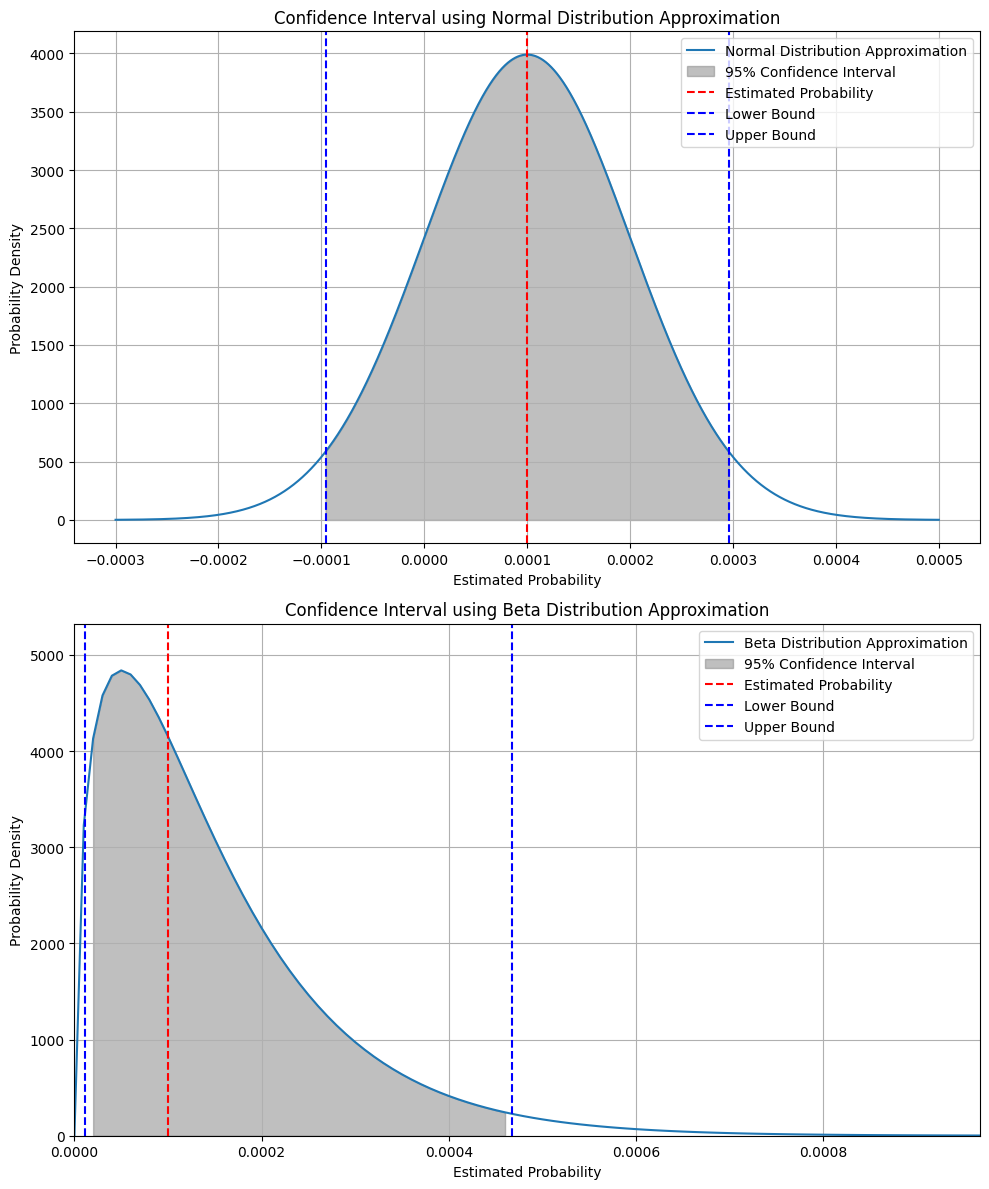

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta

# 設定
n = 10000  # 総サンプル数
k = 1      # 成功標本数
alpha = 0.05  # 優位水準（95%の信頼区間）

# 成功確率の推定値
p_hat = k / n

# 正規分布を用いた信頼区間の計算
std_error = np.sqrt(p_hat * (1 - p_hat) / n)
z = norm.ppf(1 - alpha / 2)
margin_of_error = z * std_error
norm_lower_bound = p_hat - margin_of_error
norm_upper_bound = p_hat + margin_of_error

# ベータ分布を用いた信頼区間の計算
alpha_post = k + 0.5  # ベータ分布の成功数パラメータ
beta_post = n - k + 0.5  # ベータ分布の失敗数パラメータ

beta_lower_bound = beta.ppf(alpha / 2, alpha_post, beta_post)
beta_upper_bound = beta.ppf(1 - alpha / 2, alpha_post, beta_post)

# 結果の表示
print(f"推定確率: {p_hat}")
print(f"正規分布による信頼区間: [{norm_lower_bound}, {norm_upper_bound}]")
print(f"ベータ分布による信頼区間: [{beta_lower_bound}, {beta_upper_bound}]")

# プロット
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# 正規分布の近似
x_norm = np.linspace(p_hat - 4 * std_error, p_hat + 4 * std_error, 100000)
y_norm = norm.pdf(x_norm, loc=p_hat, scale=std_error)
ax[0].plot(x_norm, y_norm, label="Normal Distribution Approximation")
ax[0].fill_between(x_norm, y_norm, where=(x_norm >= norm_lower_bound) & (x_norm <= norm_upper_bound), color='gray', alpha=0.5, label="95% Confidence Interval")
ax[0].axvline(x=p_hat, color='red', linestyle='--', label="Estimated Probability")
ax[0].axvline(x=norm_lower_bound, color='blue', linestyle='--', label="Lower Bound")
ax[0].axvline(x=norm_upper_bound, color='blue', linestyle='--', label="Upper Bound")
ax[0].legend()
ax[0].set_xlabel("Estimated Probability")
ax[0].set_ylabel("Probability Density")
ax[0].set_title("Confidence Interval using Normal Distribution Approximation")
ax[0].grid(True)

# ベータ分布の近似
x_beta = np.linspace(0, 1, 100000)
y_beta = beta.pdf(x_beta, alpha_post, beta_post)
ax[1].plot(x_beta, y_beta, label="Beta Distribution Approximation")
ax[1].fill_between(x_beta, y_beta, where=(x_beta >= beta_lower_bound) & (x_beta <= beta_upper_bound), color='gray', alpha=0.5, label="95% Confidence Interval")
ax[1].axvline(x=p_hat, color='red', linestyle='--', label="Estimated Probability")
ax[1].axvline(x=beta_lower_bound, color='blue', linestyle='--', label="Lower Bound")
ax[1].axvline(x=beta_upper_bound, color='blue', linestyle='--', label="Upper Bound")

# X軸の範囲とY軸の範囲を調整
ax[1].set_xlim([max(0, beta_lower_bound - 0.0005), min(1, beta_upper_bound + 0.0005)])
ax[1].set_ylim([0, max(y_beta) * 1.1])
ax[1].legend()
ax[1].set_xlabel("Estimated Probability")
ax[1].set_ylabel("Probability Density")
ax[1].set_title("Confidence Interval using Beta Distribution Approximation")
ax[1].grid(True)

plt.tight_layout()
plt.show()


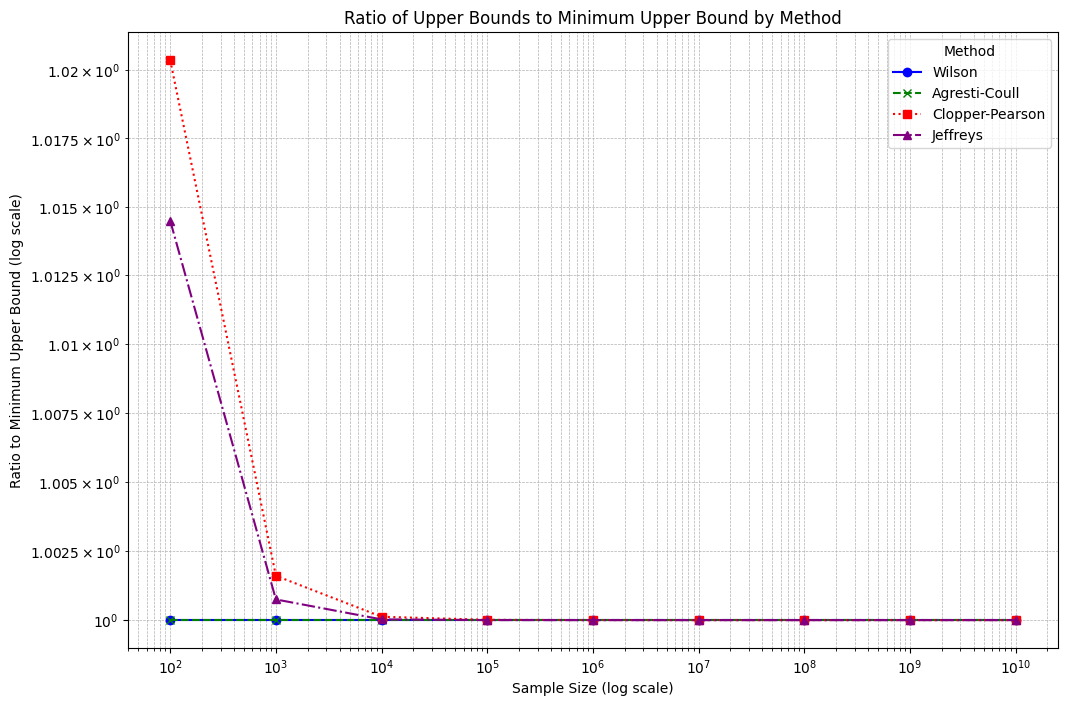

In [4]:
# 設定
alpha = 1e-6  # 誤推定確率
z = norm.ppf(1 - alpha / 2)  # 標準正規分布の分位点
sample_sizes = [100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000]

# 許容誤差 (0.5%) に対応するヒット数の設定
tolerance = 0.005

# hits = [1, 1, 1, 1, 1, 1, 1, 1, 1]
# hits = [10, 10, 10, 10, 10, 10, 10, 10, 10]
# hits = [100, 100, 100, 100, 100, 100, 100, 100, 100]
hits = [50, 500, 5000, 50000, 500000, 5000000, 50000000, 500000000, 5000000000]

# 信頼区間の上限を計算する関数
def wilson_upper_bound(n, hits, z):
    p = hits / n
    denominator = 1 + z**2 / n
    center_adj = p + z**2 / (2 * n)
    margin = z * np.sqrt(p * (1 - p) / n + z**2 / (4 * n**2))
    return (center_adj + margin) / denominator

def agresti_coull_upper_bound(n, hits, z):
    p = hits / n
    n_adj = n + z**2
    p_adj = (p * n + z**2 / 2) / n_adj
    margin = z * np.sqrt(p_adj * (1 - p_adj) / n_adj)
    return p_adj + margin

def clopper_pearson_upper_bound(n, hits, alpha):
    return beta.ppf(1 - alpha / 2, hits + 1, n - hits)

def jeffreys_upper_bound(n, hits, alpha):
    return beta.ppf(1 - alpha / 2, hits + 0.5, n - hits + 0.5)
    # return beta.ppf(1 - alpha / 2, hits + 1.0, n - hits + 2.0)

# 各手法の上限を格納するリスト
wilson_upper_limits = []
agresti_upper_limits = []
clopper_pearson_upper_limits = []
jeffreys_upper_limits = []

# 各サンプルサイズでの上限を計算
for i, n in enumerate(sample_sizes):
    wilson_upper_limits.append(wilson_upper_bound(n, hits[i], z))
    agresti_upper_limits.append(agresti_coull_upper_bound(n, hits[i], z))
    clopper_pearson_upper_limits.append(clopper_pearson_upper_bound(n, hits[i], alpha))
    jeffreys_upper_limits.append(jeffreys_upper_bound(n, hits[i], alpha))

# 各サンプルサイズで最小の上限値を基準として他の手法との倍率を計算
ratios = []
for i in range(len(sample_sizes)):
    min_value = min(wilson_upper_limits[i], agresti_upper_limits[i], clopper_pearson_upper_limits[i], jeffreys_upper_limits[i])
    ratios.append([
        wilson_upper_limits[i] / min_value,
        agresti_upper_limits[i] / min_value,
        clopper_pearson_upper_limits[i] / min_value,
        jeffreys_upper_limits[i] / min_value
    ])

# 折れ線グラフで倍率をプロット
plt.figure(figsize=(12, 8))
plt.plot(sample_sizes, [r[0] for r in ratios], label="Wilson", marker='o', linestyle='-', color='blue')
plt.plot(sample_sizes, [r[1] for r in ratios], label="Agresti-Coull", marker='x', linestyle='--', color='green')
plt.plot(sample_sizes, [r[2] for r in ratios], label="Clopper-Pearson", marker='s', linestyle=':', color='red')
plt.plot(sample_sizes, [r[3] for r in ratios], label="Jeffreys", marker='^', linestyle='-.', color='purple')

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Sample Size (log scale)")
plt.ylabel("Ratio to Minimum Upper Bound (log scale)")
plt.title("Ratio of Upper Bounds to Minimum Upper Bound by Method")
plt.legend(title="Method")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


In [36]:
from scipy.stats import beta

def find_min_sample_size(epsilon, alpha=0.05):
    # 初期の探索範囲を設定
    n_min = 1
    n_max = 1e10  # 適切な上限値を設定してください
    result_n = None
    success_p = 0.01

    while n_min <= n_max:
        n_mid = (n_min + n_max) // 2

        a = int(n_mid * success_p) + 0.5  # s + 0.5, s = 0
        b = (n_mid - int(n_mid * success_p)) + 0.5  # n - s + 0.5, s = 0

        # 信頼区間の下限と上限を計算
        lower = beta.ppf(alpha / 2, a, b)
        upper = beta.ppf(1 - alpha / 2, a, b)
        width = upper - lower

        # 信頼区間の幅が ε 以下かを確認
        if width <= epsilon:
            result_n = n_mid
            n_max = n_mid - 1  # より小さい n を探索
        else:
            n_min = n_mid + 1  # より大きい n を探索

    return result_n

# 使用例
epsilon = 0.01  # 許容される最大の信頼区間の幅
alpha = 1e-6    # 有意水準（95% 信頼区間の場合）

n = find_min_sample_size(epsilon, alpha)
print(f"必要な最小サンプルサイズ: {n}")

print(f"{beta.ppf(1 - alpha / 2, 0.5, 1000.5)}")


必要な最小サンプルサイズ: 9552.0
0.012549341428270551


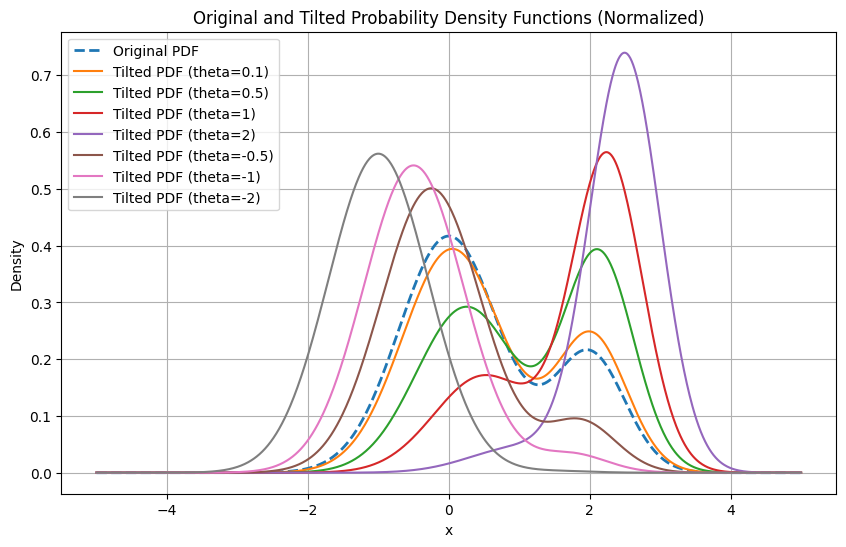

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# オリジナルな確率密度関数（正規化されていない）
def original_pdf(x):
    return np.exp(-x**2) + 0.5 * np.exp(-2 * (x - 2)**2)

# 指数傾斜された確率密度関数
def tilted_pdf(x, theta):
    return original_pdf(x) * np.exp(theta * x)

# 正規化された確率密度関数を計算
def normalized_tilted_pdf(x, theta, x_range):
    Z = np.sum(tilted_pdf(x_range, theta)) * (x_range[1] - x_range[0])  # 正規化定数
    return tilted_pdf(x, theta) / Z

# 確率密度関数をプロット
def plot_distributions(x_range, theta_values):
    plt.figure(figsize=(10, 6))
    
    # 元の分布
    Z_orig = np.sum(original_pdf(x_range)) * (x_range[1] - x_range[0])
    plt.plot(x_range, original_pdf(x_range) / Z_orig, label="Original PDF", linestyle="--", linewidth=2)
    
    # 各 θ に対する正規化された指数傾斜分布
    for theta in theta_values:
        density = normalized_tilted_pdf(x_range, theta, x_range)
        plt.plot(x_range, density, label=f"Tilted PDF (theta={theta})")
    
    # グラフの設定
    plt.title("Original and Tilted Probability Density Functions (Normalized)")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()

# 設定
x_range = np.linspace(-5, 5, 1000)  # x の範囲
theta_values = [0.1, 0.5, 1, 2, -0.5, -1, -2]  # 複数のtheta値

# 分布をプロット
plot_distributions(x_range, theta_values)


In [110]:
from scipy.stats import beta

def jeffreys_importance_sampling_ci(weights, outcomes, alpha=0.05):
    """
    Jeffreys 信頼区間を用いたWCDFP推定。
    
    Parameters:
    - weights: 重みリスト (list or numpy array)
    - outcomes: デッドラインミスを示すフラグ (0 or 1 のリスト)
    - alpha: 信頼係数 (デフォルト: 0.05 for 95% CI)
    
    Returns:
    - 推定値, 信頼区間の下限, 信頼区間の上限
    """
    weights = np.array(weights)
    outcomes = np.array(outcomes)

    # 重み付き推定値
    weighted_sum = np.sum(weights * outcomes)
    total_weight = np.sum(weights)
    p_hat = weighted_sum / total_weight

    # サンプル数
    N = len(outcomes)

    # Jeffreys 信頼区間（Beta 分布のパラメータを修正）
    a = weighted_sum + 0.5
    b = total_weight - weighted_sum + 0.5
    lower_bound = beta.ppf(alpha / 2, a, b)
    upper_bound = beta.ppf(1 - alpha / 2, a, b)

    return p_hat, max(0, lower_bound), min(1, upper_bound)

# サンプルデータ
size = 1000000
weights = np.random.exponential(scale=1, size=size)
outcomes = np.zeros(size)  # デッドラインミスなし
outcomes[500] = 0.001  # デッドラインミスあり

# WCDFP推定値と信頼区間を計算
p_hat, lower, upper = jeffreys_importance_sampling_ci(weights, outcomes)
print(f"Estimated WCDFP: {p_hat:.10f}")
print(f"95% Confidence Interval: [{lower:.10f}, {upper:.10f}]")


Estimated WCDFP: 0.0000000012
95% Confidence Interval: [0.0000000005, 0.0000025181]
